# WK08 Prep

In [5]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from matplotlib.colors import to_rgba
from sklearn.decomposition import PCA

from data_utils import MinMaxScaler, StandardScaler
from data_utils import PolynomialFeatures
from data_utils import LinearRegression
from data_utils import object_from_json_url

# Regression

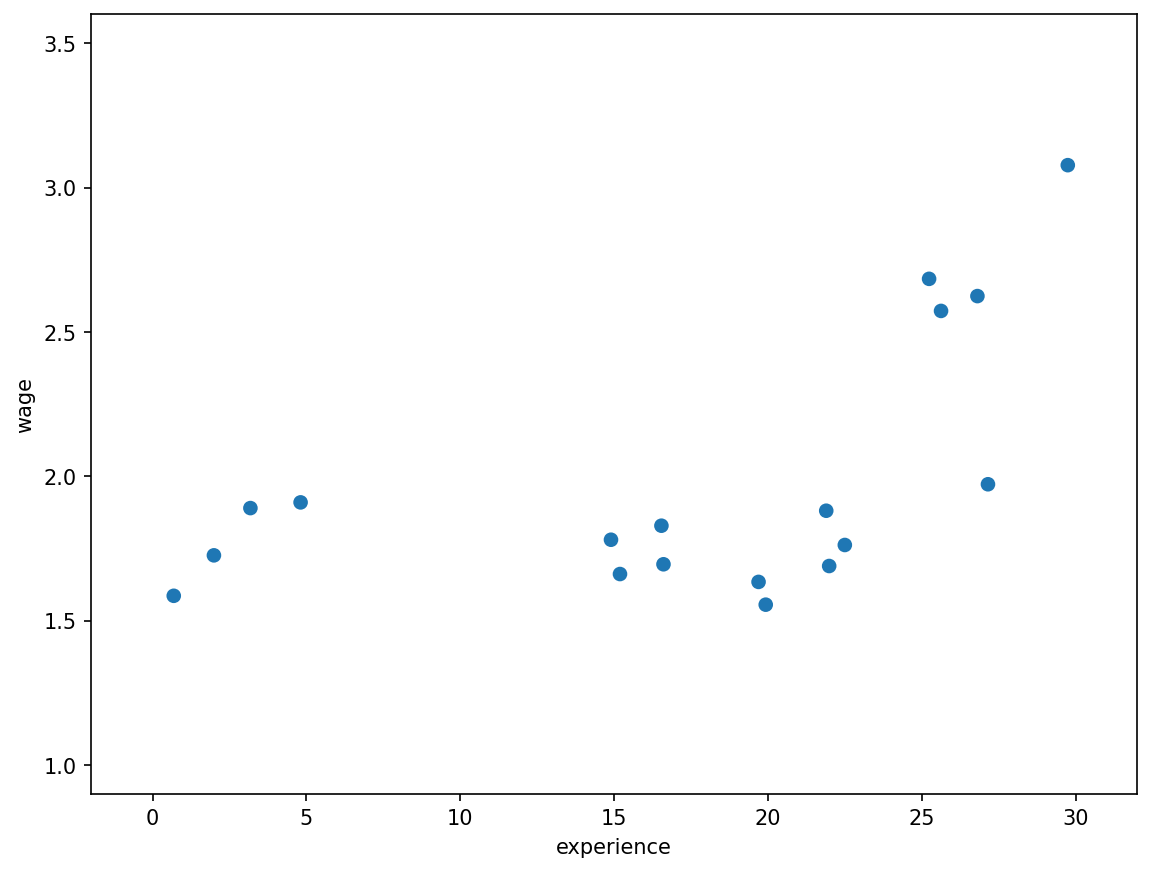

In [7]:
X = np.linspace(0, 30, 50)
y_raw = [(5 * (x - 12) ** 3 - 17 * (x + 1) ** 2 - x + random.gauss(0, x * 100)) for x in X]
y = np.array([y / 15000 + 2 for y in y_raw])

X_plot = np.array([x + random.gauss(0, 2) for x in X])
color_yes = to_rgba("#1f77b4ff")
color_no = to_rgba("#1f77b400")

cs = np.array([color_yes if random.randint(0, 4) < 2 else color_no for _ in X_plot])

plt.figure(figsize=(9, 6.75), dpi=150)
plt.scatter(X_plot, y, c=cs, marker='o', linestyle='')
plt.xlabel("experience")
plt.ylabel("wage")
plt.xlim(-2, 32)
plt.ylim(0.9, 3.6)
plt.show()

In [9]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1,1))

model = LinearRegression()
model.fit(X_poly, y)
beta = np.insert(model.coef_, 0, model.intercept_)

X_fit = np.linspace(-2, 32, 250)
y_fit = np.array([beta[0] + beta[1] * x + beta[2] * x ** 2 + beta[3] * x ** 3 for x in X_fit])

plt.figure(figsize=(9, 6.75), dpi=150)
plt.scatter(X_plot, y, c=cs, marker='o', linestyle='')
plt.plot(X_fit, y_fit, 'r')
plt.xlabel("experience")
plt.ylabel("wage")
plt.xlim(-2, 32)
plt.ylim(0.9, 3.6)
plt.show()

Exception: Feature input has wrong type. Please use pandas DataFrame

# Non-Linear Linear Regression

In [ ]:
import json

x = np.array(list(range(0, 120, 1)))
angle_m = np.random.uniform(0,10, size=len(x))*0.1
up_scale = np.random.randint(1,3, size=len(x))
y = 1234 * ((np.sin(2*x*np.pi/12 - angle_m) + 0.01*x) + up_scale) + 800

sales_df = pd.DataFrame(
  {"month": x, "sales": y}
)

sales_json = [
  {"month":int(m), "sales":int(s)} for m,s in zip(x, y)
]

plt.plot(x,y, marker='o', linestyle='-', alpha=0.3)
plt.show()

In [ ]:
with open("./sales.json", "w", encoding="utf-8") as of:
  json.dump(sales_json, of, sort_keys=True, separators=(',',':'), ensure_ascii=False)

In [ ]:
# with open("./sales.json", "r") as f:
#   json_data = json.load(f)

# sales_df = pd.DataFrame.from_records(json_data)
sales_df.head()

plt.plot(sales_df["month"], sales_df["sales"], marker='o', linestyle='', alpha=0.3)
plt.title("monthly sales")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

plt.plot(sales_df["month"], sales_df["sales"], marker='o', linestyle='-', alpha=0.3)
plt.title("monthly sales")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

sales_scaler = MinMaxScaler()
sales_scaled_df = sales_scaler.fit_transform(sales_df)

# Create a model
sales_model = LinearRegression()
sales_model.fit(sales_scaled_df[["month"]], sales_scaled_df["sales"])

predicted_scaled = sales_model.predict(sales_scaled_df[["month"]])

# Un-normalize the data
predicted = sales_scaler.inverse_transform(predicted_scaled)

plt.plot(sales_df["month"], sales_df["sales"], marker='o', alpha=0.3)
plt.plot(sales_df["month"], predicted, marker='', color='r')
plt.title("monthly sales")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

In [ ]:
def sinx(x):
  return np.sin(2*x*np.pi/12)

sales_scaled_df["periodic_month"] = sales_df["month"].apply(sinx)

# Create a model
features = sales_scaled_df.drop(columns=["sales"])

sales_model = LinearRegression()
sales_model.fit(features, sales_scaled_df["sales"])
predicted_scaled = sales_model.predict(features)

# Un-normalize the data
predicted = sales_scaler.inverse_transform(predicted_scaled)

plt.plot(sales_df["month"], sales_df["sales"], marker='o', alpha=0.3)
plt.plot(sales_df["month"], predicted, marker='', color='r')
plt.title("monthly sales")
plt.xlabel("month")
plt.ylabel("sales")
plt.show()

# Classification

In [ ]:
## 1. Load Dataset
WINE_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/wines.json"

# Read into DataFrame
wines_data = object_from_json_url(WINE_FILE)
wines_df = pd.DataFrame.from_records(wines_data)

## 3. Normalize
wine_scaler = StandardScaler()
wines_scaled = wine_scaler.fit_transform(wines_df)

features = wines_scaled.drop(columns=["quality"])
wines_scaled.cov()["quality"].sort_values()

In [ ]:
wine_pca = PCA()
wines_pcad = wine_pca.fit_transform(features.values)

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [ ]:
x = features["alcohol"].values
y = features["density"].values
c = [colors[int(i)] for i in wines_scaled["quality"].values]

plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.7)
plt.show()

In [ ]:
x = wines_pcad[:, 0]
y = wines_pcad[:, 1]
c = [colors[int(i)] for i in wines_scaled["quality"].values]

# Plot the PCAs
plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.7)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

## 5. Create a KMeans object
km_model = KMeans(n_clusters=4, n_init=10)

# Create a model that tries to group wines by features
result = km_model.fit(features.values)

## 6. Run the model on the training data
predicted_scaled = km_model.predict(features.values)

In [ ]:
x = features["alcohol"].values
y = features["density"].values
c = [colors[i] for i in predicted_scaled]

plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.5)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.show()

In [ ]:
x = wines_pcad[:, 0]
y = wines_pcad[:, 1]
c = [colors[i] for i in predicted_scaled]

# Plot the PCAs
plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.5)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()


# Iris

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X_reduced = PCA(n_components=3).fit_transform(iris.data)

In [ ]:
x = iris.data[:, 0]
y = iris.data[:, 1]
c = [colors[int(i)] for i in iris.target]

plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.5)
plt.show()

In [ ]:
x = X_reduced[:, 0]
y = X_reduced[:, 1]
c = [colors[int(i)] for i in iris.target]


plt.figure(figsize=(9, 6.75), dpi=150)
plt.scatter(x, y, color=colors[0], marker='o', linestyle='', alpha=0.7)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

plt.figure(figsize=(9, 6.75), dpi=150)
plt.scatter(x, y, color=c, marker='o', linestyle='', alpha=0.7)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()